# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [ ]:
data['education'] = data['education'].str.lower()

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

** На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

** Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**


In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
#Сводная таблица количество должников, количеством человек в группе и процентное соотношение
data_pivot_debt = pd.pivot_table(data, index = 'children', values = 'debt', aggfunc = 'sum')
data_pivot_debt['all_people'] = data.loc[:, 'children'].value_counts()
data_pivot_debt['percent'] = round((data_pivot_debt['debt'] / data_pivot_debt['all_people']) * 100, 2)
data_pivot_debt.sort_values(by = 'percent').reset_index()

,children,debt,all_people,percent
0,5,0,9,0.00
1,0,1063,14091,7.54
2,3,27,330,8.18
3,1,444,4808,9.23
4,2,194,2052,9.45
5,4,4,41,9.76


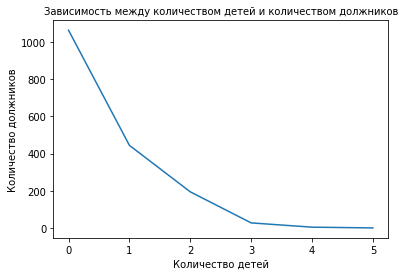

In [ ]:
# Импорт библиотке matplotlib и визуализация изучаемых зависимостей
import matplotlib.pyplot as plt
plt.plot(data_pivot_debt['debt'])
plt.xlabel( "Количество детей" , size = 10 )
plt.ylabel( "Количество должников" , size = 10 )
plt.title( "Зависимость между количеством детей и количеством должников" , size = 10 )
plt.show()

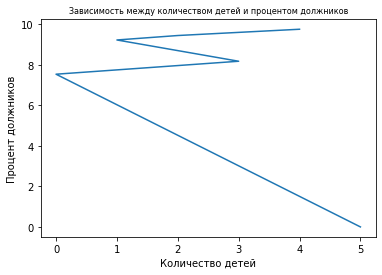

In [ ]:
plt.plot(data_pivot_debt['percent'].sort_values(ascending = True))
plt.xlabel( "Количество детей" , size = 10 )
plt.ylabel( "Процент должников" , size = 10 )
plt.title( "Зависимость между количеством детей и процентом должников" , size = 8 )
plt.show()

**Вывод:**
<div class="alert alert-block alert-info">
    В результате анализа, полученной сводной таблицы, и построения первого графика можно сказать, что количество должников уменьшается с увеличением количества детей, но однако так оценивать зависимость не корректно, потому что не учтено общее количество людей в категории, разделённых по количеству детей. Для этого нужно посмотреть на процентное соотношение, о чем и говорит второй график, и последний столбец в таблице, из него уже можно сделать вывод, что самыми платежноспособными заёмщики являются люди без детей, так как их процент составляет 7,54 %, а самая большая доля должников в семьях с 4 детьми с процентом 9,76 %, также стоит отметить группу людей с 5-ю детьми, там должников вообще нету, но и всего в этой группе 9 человек.
</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

<div class="alert alert-block alert-info">
    Тут также добавил сводную таблицу, надо было учесть размеры категорий, если правильно понял, то добавить столбец <b>all_people </b>.
</div>

In [ ]:
#Сводная таблица количество должников, количеством человек в группе по семейному положению и процентное соотношение
data_pivot_family = pd.pivot_table(data, index = 'family_status', values = 'debt', aggfunc = 'sum')
data_pivot_family['all_people'] = data.loc[:, 'family_status'].value_counts()
data_pivot_family['percent'] = round((data_pivot_family['debt'] / data_pivot_family['all_people']) * 100, 2)
data_pivot_family.sort_values(by = 'percent').reset_index()

,family_status,debt,all_people,percent
0,вдовец / вдова,63,951,6.62
1,в разводе,84,1189,7.06
2,женат / замужем,927,12261,7.56
3,гражданский брак,385,4134,9.31
4,Не женат / не замужем,273,2796,9.76


**Вывод:**
<div class="alert alert-block alert-info">
    Как и в предыдущем случае можно посмотреть на количество задолжностей в каждой категории семейного статуса и видим, что самое большое число у людей с семьёй, но в соотношении с общем количеством людей в категории, семейные пары показывают результат лучше, чем люди <b>в разводе или не женатые/не замужем</b>, в данных категориях процент должников самый большой, а самые кредитоспособные это люди из разряда <b>вдовец / вдова </b>.
</div>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
#Сводная таблица количество должников, количеством человек в группе по уровню дохода и процентное соотношение
data_pivot_income = pd.pivot_table(data, index = 'total_income_category', values = 'debt', aggfunc = 'sum')
data_pivot_income['all_people'] = data.loc[:, 'total_income_category'].value_counts()
data_pivot_income['percent'] = round((data_pivot_income['debt'] / data_pivot_income['all_people']) * 100, 2)
data_pivot_income.sort_values(by = 'percent').reset_index()

,total_income_category,debt,all_people,percent
0,D,21,349,6.02
1,B,354,5014,7.06
2,A,2,25,8.00
3,C,1353,15921,8.50
4,E,2,22,9.09


**Вывод:**
<div class="alert alert-block alert-info">
Вспоним как именно мы разделили людей на категории по их доходам:
    
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.
    
Видим, что из всех 21331 - ого  человека больше всего должников в категории `'C'` - 1353. Но, оценивая возможность выплачивать кредит во время данная категория находится на втором месте, возможно данные люди, будучи уверенными в своих доходах, берут кредит в больших размерах или короткий срок и не успевают выплатить, в свою очередб лучший показатель у категории `'D'`, эти люди более размерены и умеют грамотно распределить свои доходы, сложнее всего уложиться в срок людям из группы `'E'`, исходя из целей взятия кредита, этим заёмщиках нужна большая сумма, но так как доход не большой, возвращать будет тяжело.
</div>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
#Сводная таблица количество должников, количеством человек в группе по их целям и процентное соотношение
data_pivot_purpose = pd.pivot_table(data, index = 'purpose_category', values = 'debt', aggfunc = 'sum')
data_pivot_purpose['all_people'] = data.loc[:, 'purpose_category'].value_counts()
data_pivot_purpose['percent'] = round((data_pivot_purpose['debt'] / data_pivot_purpose['all_people']) * 100, 2)
data_pivot_purpose.sort_values(by = 'percent').reset_index()

,purpose_category,debt,all_people,percent
0,операции с недвижимостью,780,10751,7.26
1,проведение свадьбы,183,2313,7.91
2,получение образования,369,3988,9.25
3,операции с автомобилем,400,4279,9.35


**Вывод:**
<div class="alert alert-block alert-info">
    Из общей массы заёмщиков больше всего должников у тех, кто манипулирует с недвижимостью, это и следовало ожидать, так как траты на недвижимость будут больше, чем цели в остальных категориях. Но данная часть людей показывает наилучший показатель по закрытию кредита в срок, самыми не надежными являются обладатели нового трапспортного средства, а также граждане, которые хотят чему то научиться новому и получить образование.
</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*
Пропуски были найдены в столбцах с трудовым стажем и доходом. Можно сказать, что произошел сбой в системе и данные значение не прогрузились, но также клиент банка мог их не указать и данная информация была на уточнении у работников банка, при заполнении анкеты были установлены требования записи, но клиент их не учел и система их не приняла.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана является несмещенной мерой центральной тенденции данных и не подвержена влиянию выбросов. При использовании среднего значения для заполнения пропусков существует риск искажения распределения данных, особенно если среднее сильно отличается от медианы. Медиана представляет собой значение, которое делит набор данных ровно пополам

### Шаг 4: общий вывод.

В ходе выполнения проекта была исследована надежность заёмщиков банка. При анализе предоставленной таблицы были найдены ячейки с пропусками и аномальными значениями, которые могли бы помешать произвести вычисления каких-либо параметров, для устронения были выполнены следующие действия:
* устранены пропуски в стобцах с трудовым стажем и доходами клиентов, всего их было по 2174 из 21331, вместо них появились медианные значения по каждому столбцу и по каждому типу занятости;
* аномальные значения по типу: отрицательный срок трудового стажа, отрицательное количество детей и слишком большое число детей. В случае с трудовым стажем значения взяли по модулю, а в случае с количеством детей данные строки удалены;
* было найдено 71 дубликат в данных, лишние строки удалены;
* кроме работы с исправлением данных, было добавлено два столбца, в которых отражено разбиение клиентов по категориям, в зависимости от дохода и цели взятия кредита;

После полной обработки таблицы была изучена возможность закрывать кредит в установленное время.Таким образом, получились следующие результаты:

- иссследование зависимости от количества детей показало, что лучше всего возвращают кредит клиенты с 5-ю детьми, должников в этой категории 0, также хороший показатель у людей без детей - 7,54% не вернувших кредит в срок, а хуже всего возвращают деньги клиенты с 4-мя детьми - 9,76%, близко к ним располагаются семьи с 2-мя детьми - 9,45% должников;

- зависимость от семейного положения показала, что клиенты, являющиеся вдовой и вдовцом, более кредитоспособные, доля неплательщиков составляет - 6,62%, чем остальные, и хуже всего выплачивали кредит клиенты, не состоящие в браке - 9,76% заёмщиков, близки к ним кленты состоящие в гражданском браке - 9,31%;

- анализ зависимости от дохода доказал, что самые пунктуальные люди с доходом от 30 000 до 50 000 тысяч, всего 6,02% не смогли вернуть деньги в установленное время, а противоположную сторону занимают клиенты с доходом менее 30 000 - 9,09% людей остались с не хорошей репутацией перед банком;

- последняя зависимость, от цели взятия кредита, утвердила, что дорогостоящая покупка в форме недвижимости не является проблемой выплачивать кредит в срок, обладатели нового жилья лучшие в погашении долга - 7,26% должниов, а вот покупка нового автомобиля вызывает трудности и данная цель затрудняет выплату денег банку, не вернувших кредит в срок составляет 9,35% от всех людей в данной категории.


Таким образом, сотрудникам банка следует опираться на предоставленную статистику по возврату кредита в установленные сроки и оценивать насколько клиент кредитоспособен.
